In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Automobile_insurance_fraud.csv")   
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Also, we can see from above that the Input column 'policy_bind_date' & 'incident_date' is being taken as object type Data. Which is not correct. So, Changing these Column into timestamp DataType.

In [5]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

We can see that 'policy_bind_date' & 'incident_date' is now converted in datetime format.

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

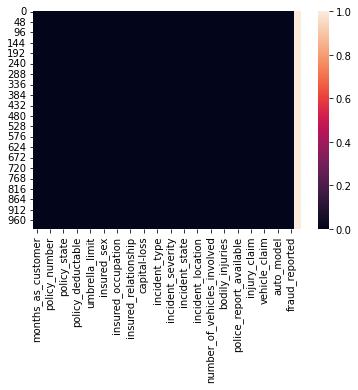

In [8]:
sns.heatmap(df.isnull())

There are Null values present in _c39 column in the Data.

In [9]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<AxesSubplot:>

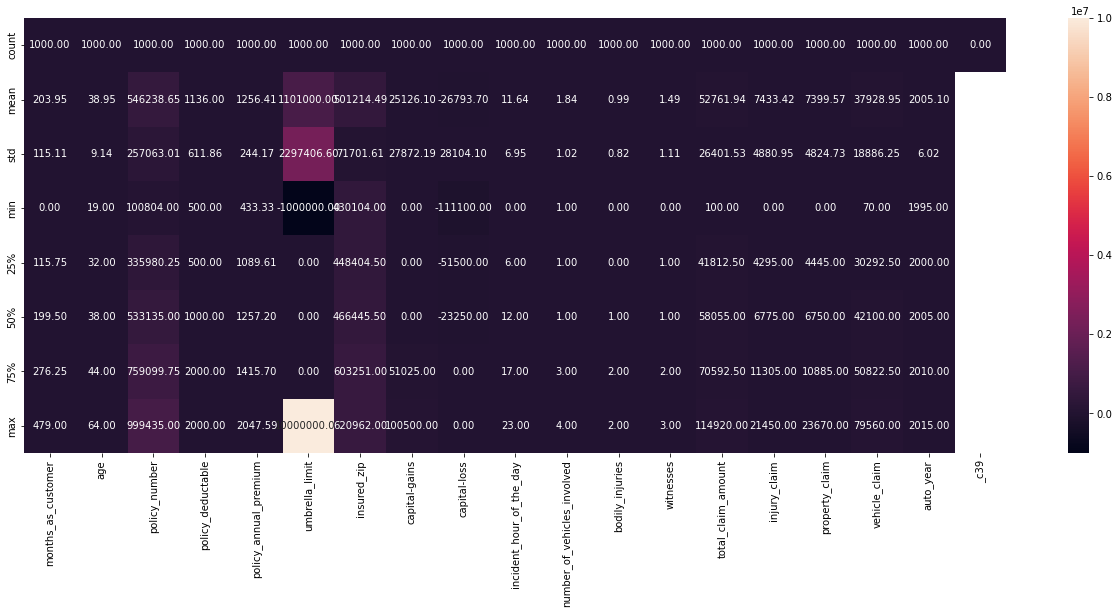

In [11]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

# Data Preprocessing

In [12]:
df.collision_type.unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [13]:
df.property_damage .unique()

array(['YES', '?', 'NO'], dtype=object)

In [14]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

Looking closely to the data from above we can see that the Columns 'collision_type','property_damage'& 'police_report_available' contains ' ? ' as the entries which corresponds to the Null Values.

Converting '?' into Null Values whereever present in the DataSet.

In [15]:
df = df.replace('?', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [16]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Now we can see that the Null values are present in the DataSet.

# Exploratory Data Analysis & Visualization

UNIVARIATE ANALYSIS of Categorical Columns

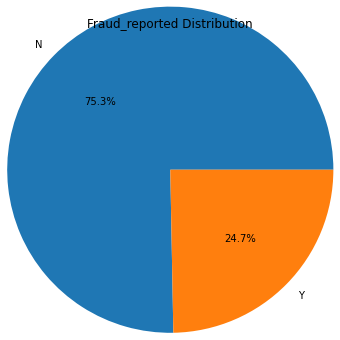

N    753
Y    247
Name: fraud_reported, dtype: int64


In [17]:
lb = df['fraud_reported'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Fraud_reported Distribution")
plt.show()
print(df['fraud_reported'].value_counts())

From above we can see that 24.7% of Insurance claims made were Fraud while 75.3 % were genuine. 

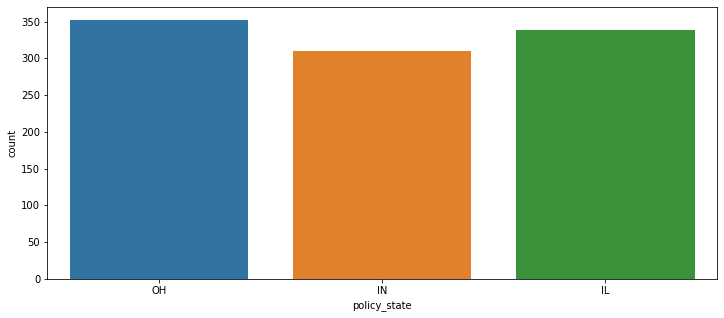

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x='policy_state',data=df)
plt.show()

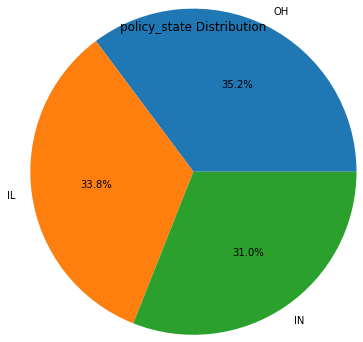

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


In [19]:
lb = df['policy_state'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("policy_state Distribution")
plt.show()
print(df['policy_state'].value_counts())

From above we can see that Ohio has maximum numbers of Incurance Claims followed by Illinois & Indiana.

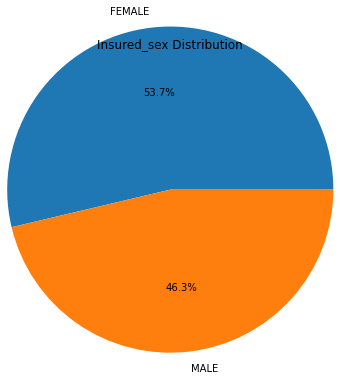

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [20]:
lb = df['insured_sex'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Insured_sex Distribution")
plt.show()
print(df['insured_sex'].value_counts())

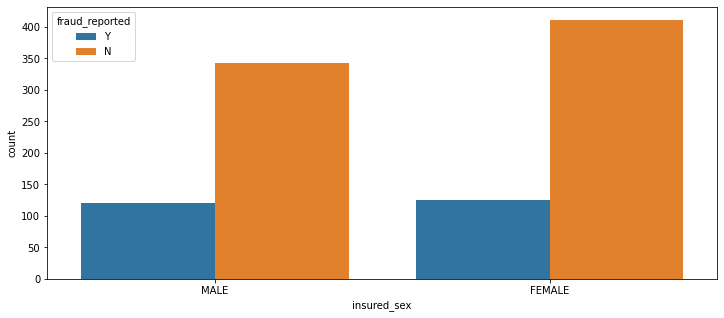

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS: - 
   1. We can see that 53.7% people insured are females while 46.3% are males.
   2. Also, we can see that Males are more likely to be detected as Fraud.

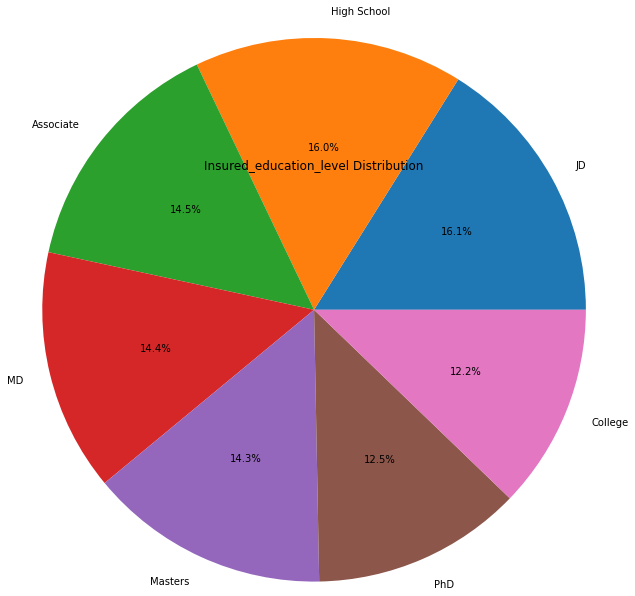

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [22]:
lb = df['insured_education_level'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2.5, autopct='%1.1f%%')
plt.title("Insured_education_level Distribution")
plt.show()
print(df['insured_education_level'].value_counts())

We can that Most people are having education till JD & High School.

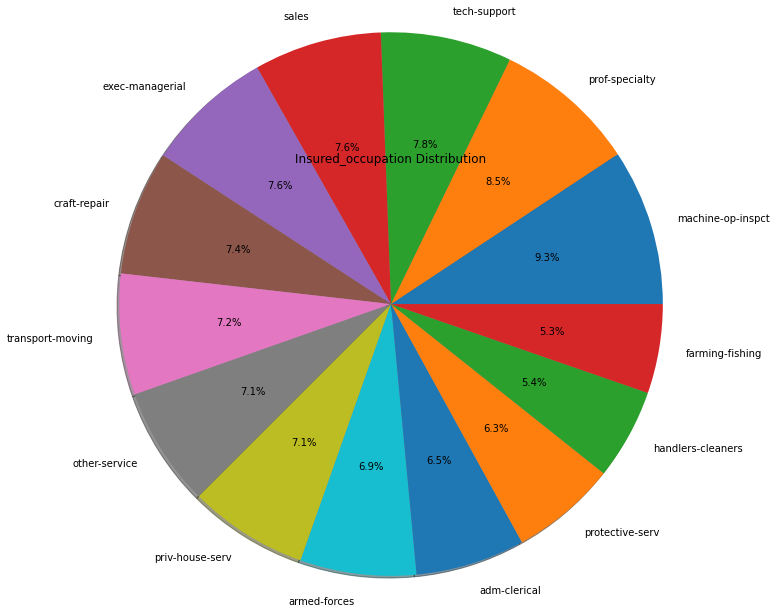

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [23]:
lb = df['insured_occupation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2.5,shadow=True,autopct='%1.1f%%')
plt.title("Insured_occupation Distribution")
plt.show()
print(df['insured_occupation'].value_counts())

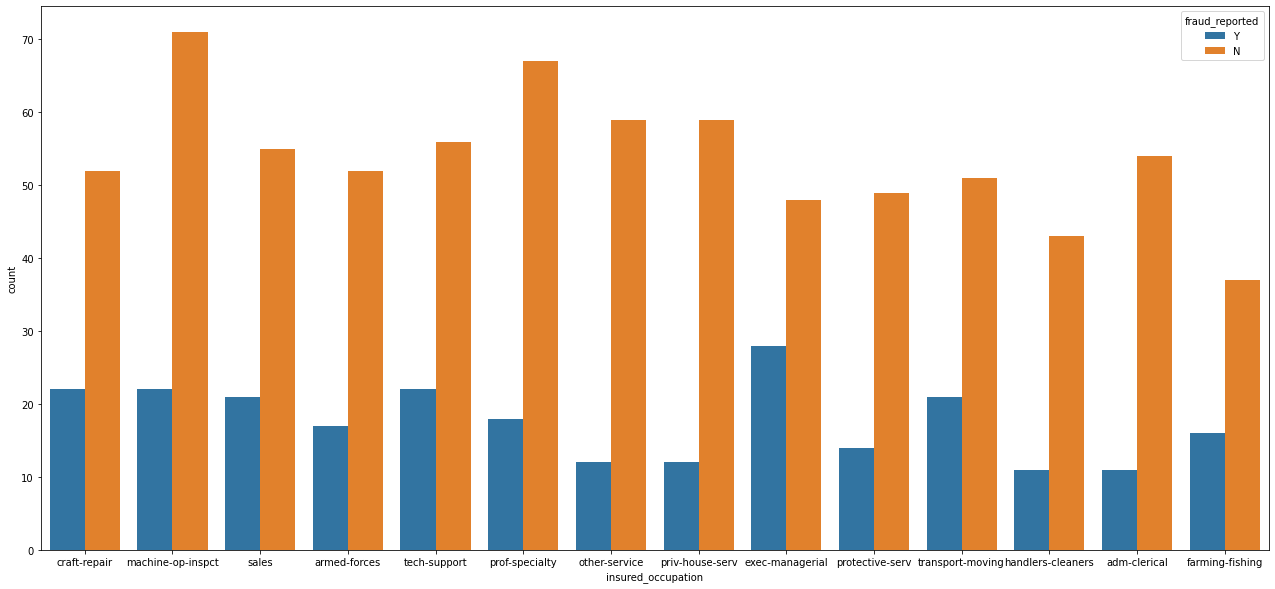

In [24]:
plt.figure(figsize=(22,10))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS:-
   1. Most of the people are employed as 'machine-op-inspct' followed by 'prof-specialty' & 'tech-support'. While people employed as 'farming-fishing' are least in numbers.
   2. We can see that people employeed into 'exec-managerial' are more likely to be fraud. While priv-house-serv, adm-clerical people are least likely to be fraud.

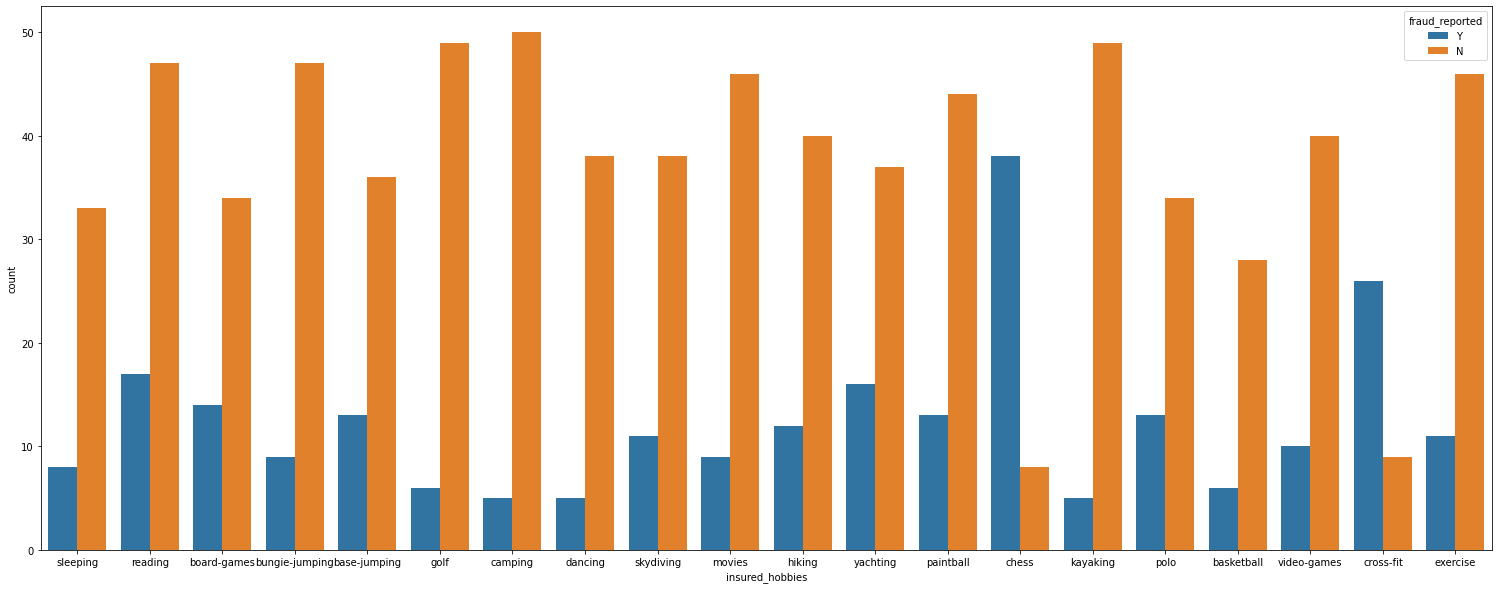

In [25]:
plt.figure(figsize=(26,10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS:-
   1. We can see that people with hobbies chess & cross-fit are highly likely to be detected as fraud in Insurance Claims.
   2. While people with hobbies like camping, kayaking & golf are least likely to be detected as fraud.

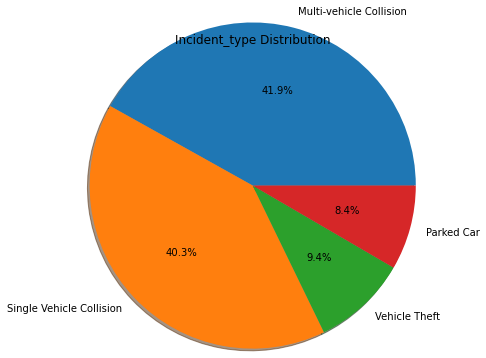

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [26]:
lb = df['incident_type'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Incident_type Distribution")
plt.show()
print(df['incident_type'].value_counts())

We can see that most of the Insurance claims made were due to Multi-Vehile Collision(41.9%) while Single Vehile Collosion reported is 40.3% followed by Vehicle Theft(9.4%) & Parked Car(8.4%).

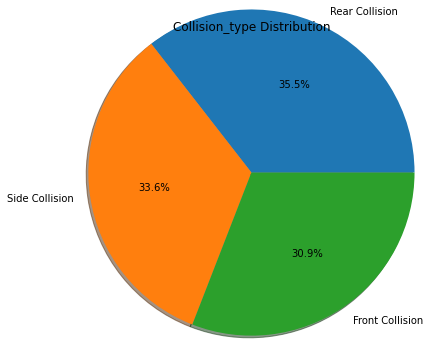

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [27]:
lb = df['collision_type'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Collision_type Distribution")
plt.show()
print(df['collision_type'].value_counts())

Most of the claims made were with Rear Collision followed be Side & Front Collision.

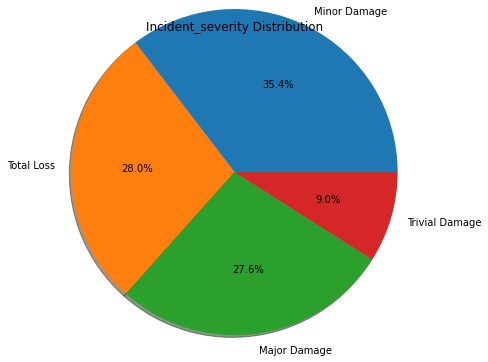

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


In [28]:
lb = df['incident_severity'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Incident_severity Distribution")
plt.show()
print(df['incident_severity'].value_counts())

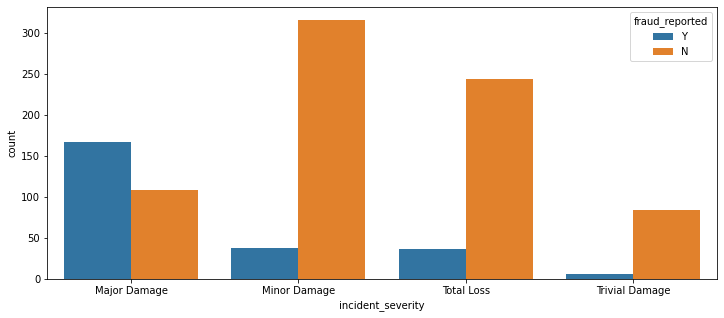

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS :-
   1. Most of the Insurance claims made are accounts for Minor Damage(35.4%) followed by claims for Total Loss(28%), Major Damage(27.6%) & Trivial Damage(9%).
   2. Also, Claims made under Major Damage are highly likely to be a Fraud Claim.

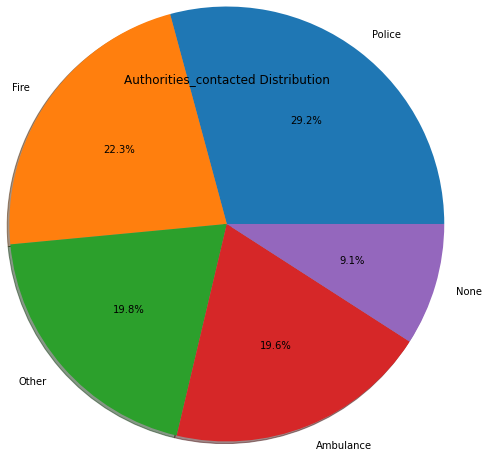

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [30]:
lb = df['authorities_contacted'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2,shadow=True,autopct='%1.1f%%')
plt.title("Authorities_contacted Distribution")
plt.show()
print(df['authorities_contacted'].value_counts())

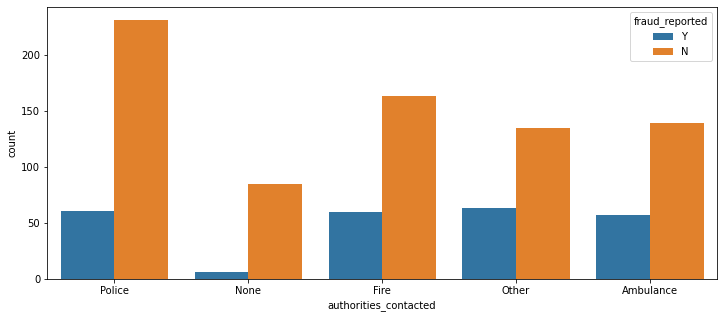

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS:-
   1. Authorities contacted in most of the accidents is Police(29.2%) followed by Fire(22.3%), Other(19.8%), Ambulance(19.6%) & only in 9.1% cases no authorities were contacted.
   2. Also, when only Fire dept. others are contacted then the Insurance claim made are more likely to be a Fraud.

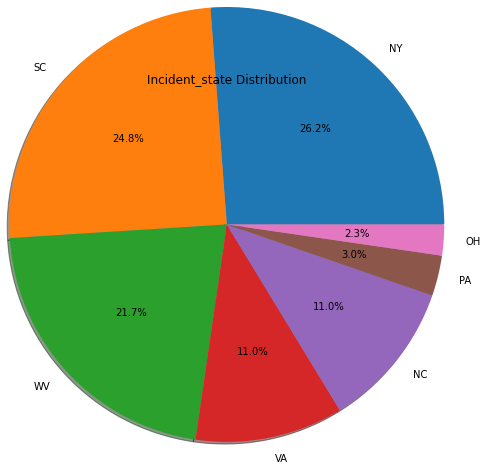

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [32]:
lb = df['incident_state'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2,shadow=True,autopct='%1.1f%%')
plt.title("Incident_state Distribution")
plt.show()
print(df['incident_state'].value_counts())

Most of the Insurance Claims made have NY(26.2%) followed by SC(24.8%) as the State where the Incident has occured. While least Claims were made with OH as the Incident State.

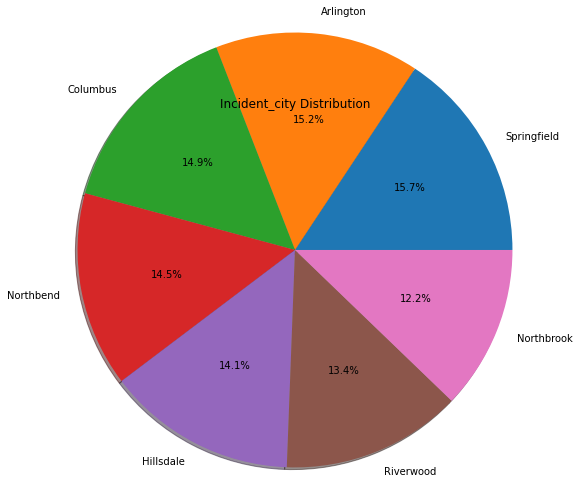

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [33]:
lb = df['incident_city'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2,shadow=True,autopct='%1.1f%%')
plt.title("Incident_city Distribution")
plt.show()
print(df['incident_city'].value_counts())

Most of the Insurance Claims made have Springfield(15.7%) followed by Arlington(15.2%) as the Incident_City where the Incident has occured. While least Claims were made with Northbrook(12.2%) as the Incident City.

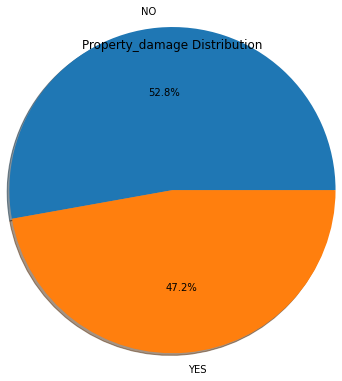

NO     338
YES    302
Name: property_damage, dtype: int64


In [34]:
lb = df['property_damage'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Property_damage Distribution")
plt.show()
print(df['property_damage'].value_counts())

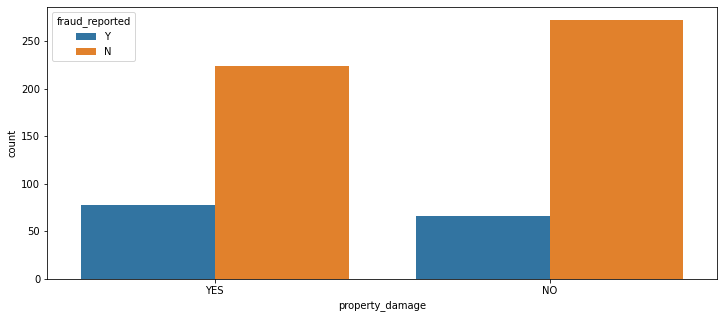

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='property_damage',hue='fraud_reported',data=df)
plt.show()

OBSERVATIONS:-
   1. Most of the Claims made were with No property damage(52.8%).
   2. Also, Claims made with where property damage is shown Yes are more likely to be a Fraud Claim. 

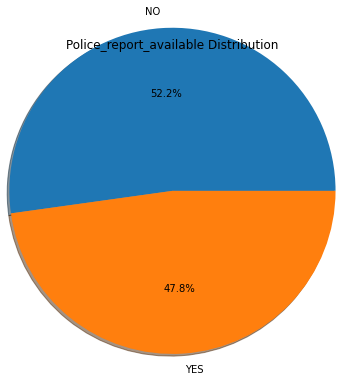

NO     343
YES    314
Name: police_report_available, dtype: int64


In [36]:
lb = df['police_report_available'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Police_report_available Distribution")
plt.show()
print(df['police_report_available'].value_counts())

In most of the Insurance claims No police report is avaliable (52.2%) while in 47.8% claims police report is present.

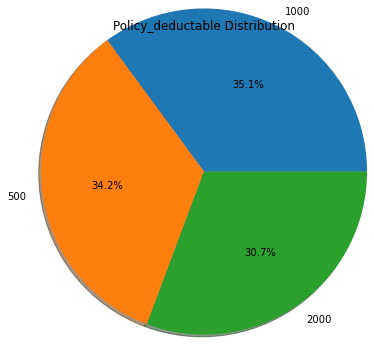

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


In [37]:
lb = df['policy_deductable'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Policy_deductable Distribution")
plt.show()
print(df['policy_deductable'].value_counts())

Most of the people have policy deductable of 1000(35.1%) followed by 500(34.2%) & 2000(30.7%).

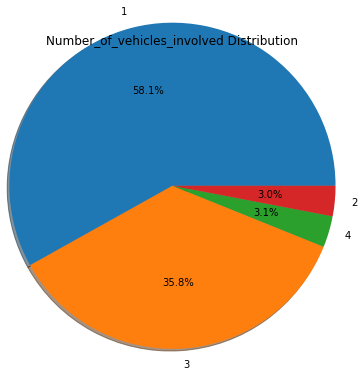

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


In [38]:
lb = df['number_of_vehicles_involved'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Number_of_vehicles_involved Distribution")
plt.show()
print(df['number_of_vehicles_involved'].value_counts())

Vehilcles involved in most of the accidents is 1(58.1%) followed by 3 vehicles(35.8%), 4 (3.1%) & only 2 vehicles(3.0%). 

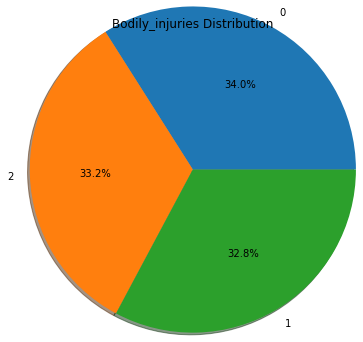

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


In [39]:
lb = df['bodily_injuries'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Bodily_injuries Distribution")
plt.show()
print(df['bodily_injuries'].value_counts())

Most of the incidents involve No. bodily injuries(34%).

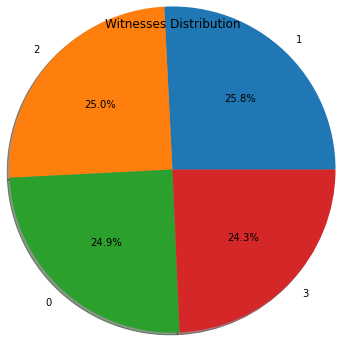

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


In [40]:
lb = df['witnesses'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True,autopct='%1.1f%%')
plt.title("Witnesses Distribution")
plt.show()
print(df['witnesses'].value_counts())

We can see that there is almost equal distribution b/w the No. of witnesses in the accident.

UNIVARIATE ANALYSIS of Continuous Columns

DISTRIBUTION PLOTS

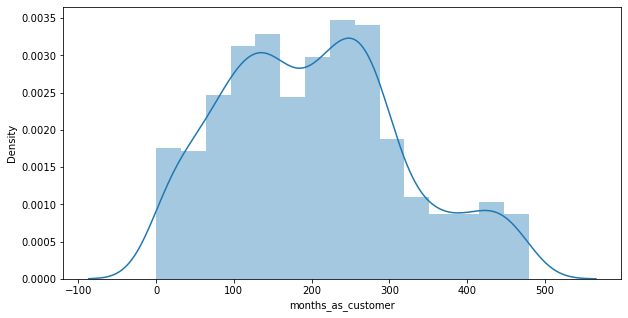

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df['months_as_customer'])
plt.show()

We can see that the the most of the people have been a customer for 150-300 Months. Also, the data is Right Skewed.

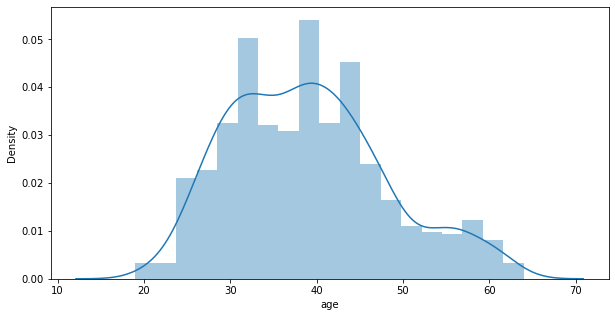

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(df['age'])
plt.show()

We can see that the average age of customers is b/w 30-45. 

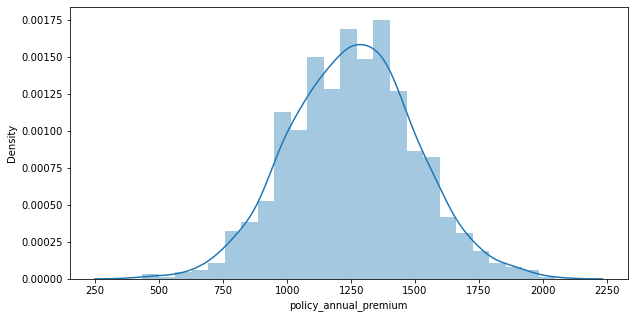

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['policy_annual_premium'])
plt.show()

The average policy annual premium of customers is around 1300. Also, the column is left skewed.

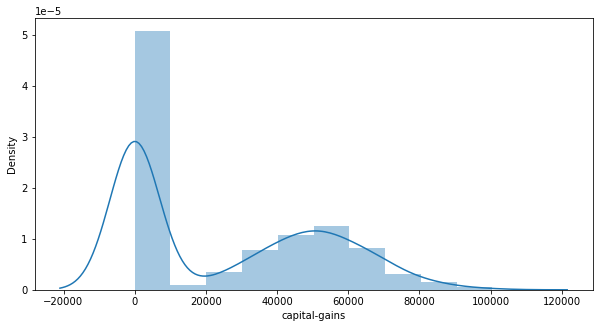

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df['capital-gains'])
plt.show()

The column is Binodal.

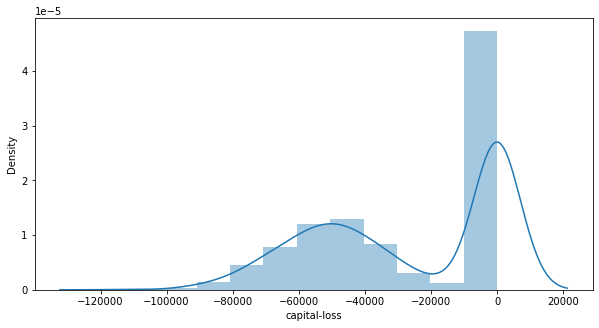

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df['capital-loss'])
plt.show()

The column is Bi-nodal.

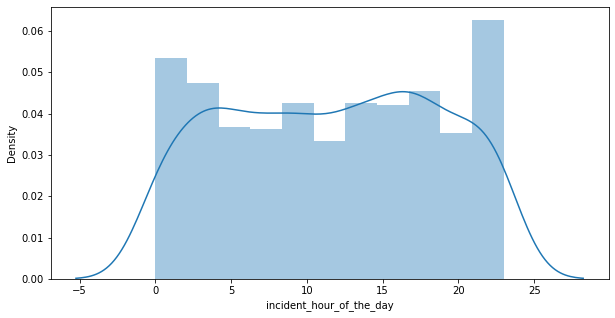

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(df['incident_hour_of_the_day'])
plt.show()

We can see that the incidents are almost equally distributed throughout the day.

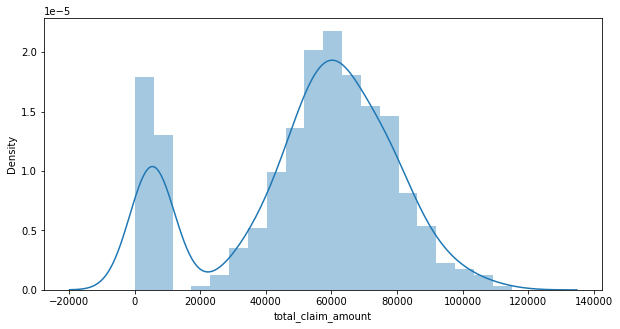

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(df['total_claim_amount'])
plt.show()

The average claim amount by the customers is around 60000. Also, the column is Bi-nodal.

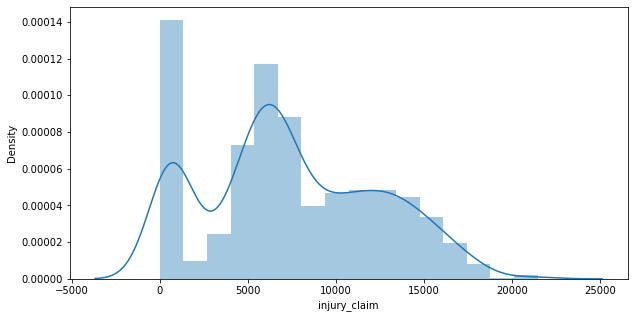

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df['injury_claim'])
plt.show()

The column is Bi-nodal.

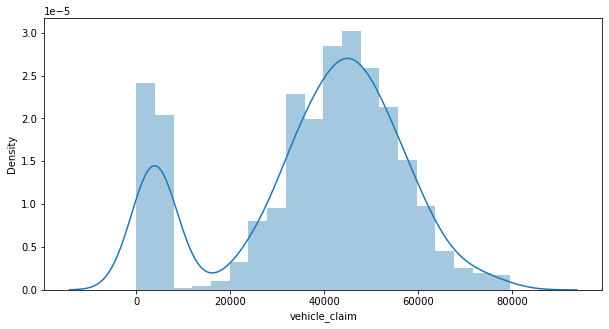

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df['vehicle_claim'])
plt.show()

The column is Bi-nodal.

From above we can see that the continuous data columns are skewed or Bi-nodal. That means transformation techniques will be required to standardise the Data.

# Bivariate Analysis

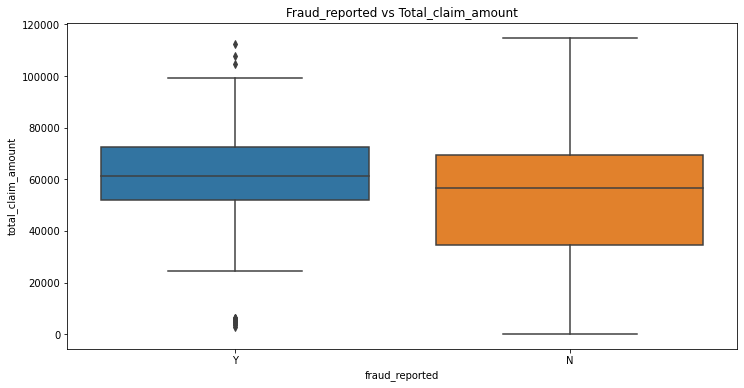

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='fraud_reported',y='total_claim_amount',data=df)
plt.title("Fraud_reported vs Total_claim_amount")
plt.show()

From above we can see that Total Claim amount made by the customer is more in case if Fraud is reported Yes.

<function matplotlib.pyplot.show(close=None, block=None)>

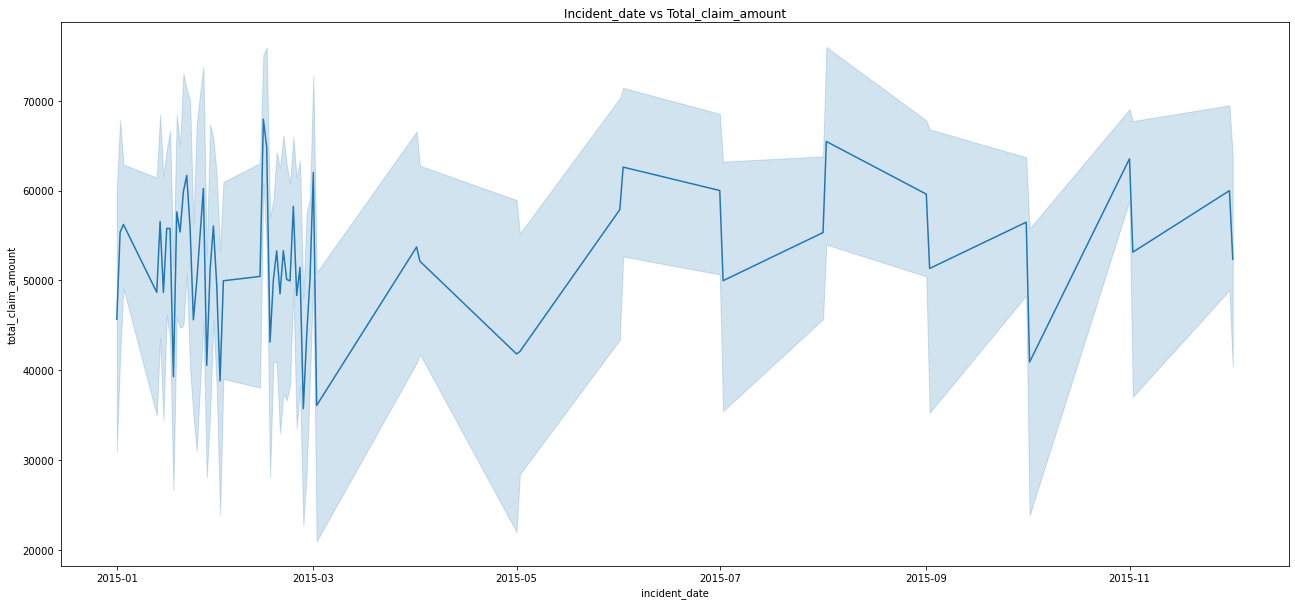

In [51]:
plt.figure(figsize=(22,10))
sns.lineplot(x='incident_date',y='total_claim_amount',data=df)
plt.title("Incident_date vs Total_claim_amount")
plt.show

From above we can see that the Highest Claim amount is made b/w - July'2015 to Spet'2015.

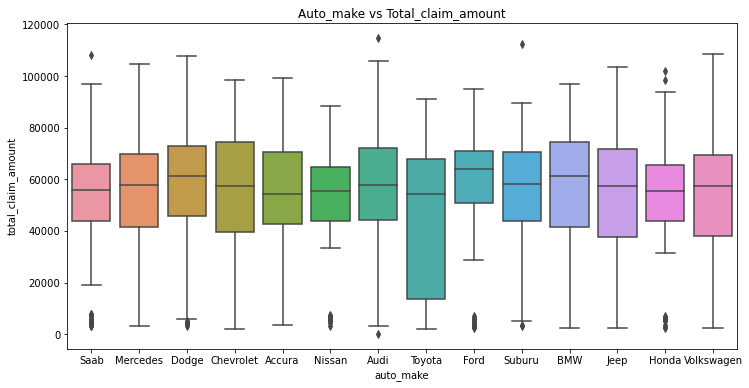

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='auto_make',y='total_claim_amount',data=df)
plt.title("Auto_make vs Total_claim_amount")
plt.show()

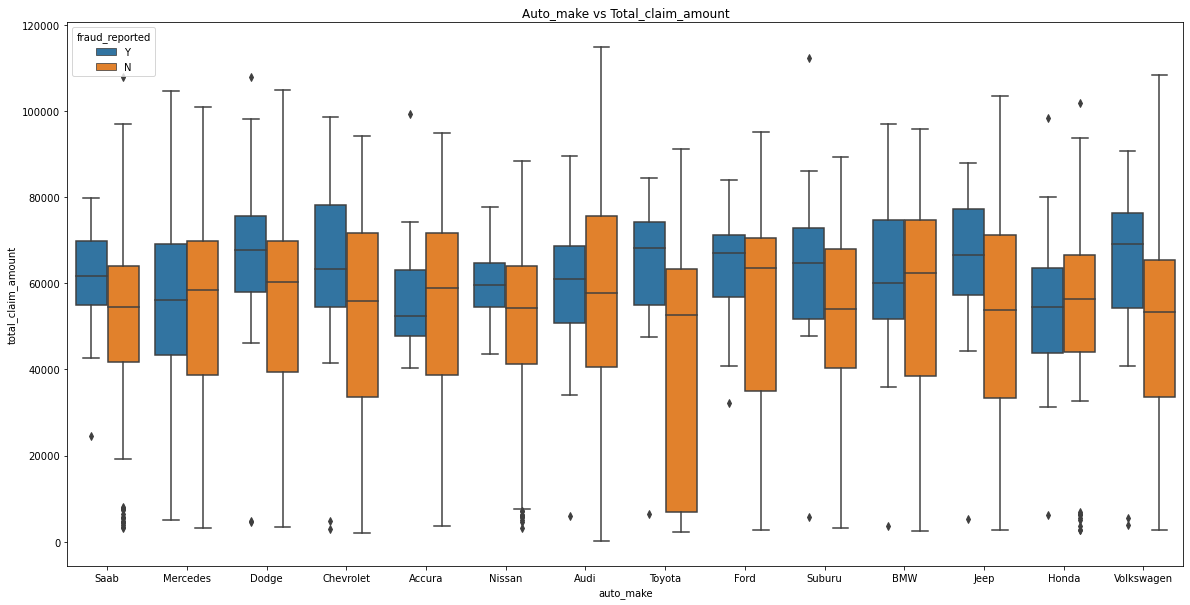

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x='auto_make',y='total_claim_amount',hue='fraud_reported',data=df)
plt.title("Auto_make vs Total_claim_amount")
plt.show()

From above we can see that the Highest Claim Amount is done by an Audi Owner.

Whereas, Owner of Dodge are making Highest Claim amount in case of Fraud Claim. 

# Regression Plots

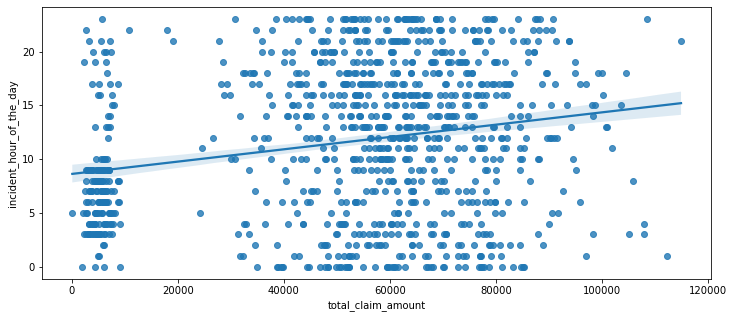

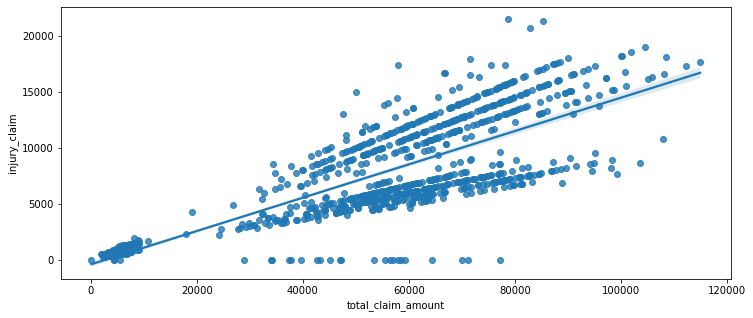

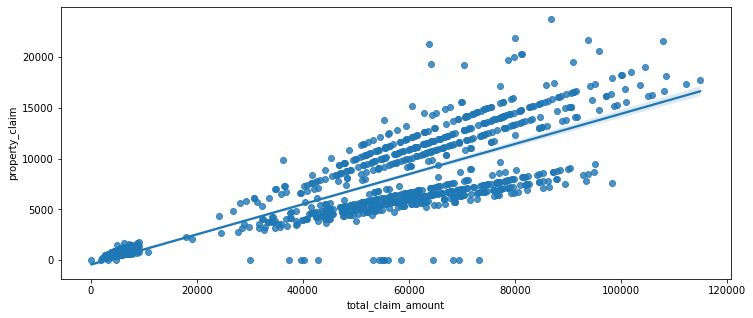

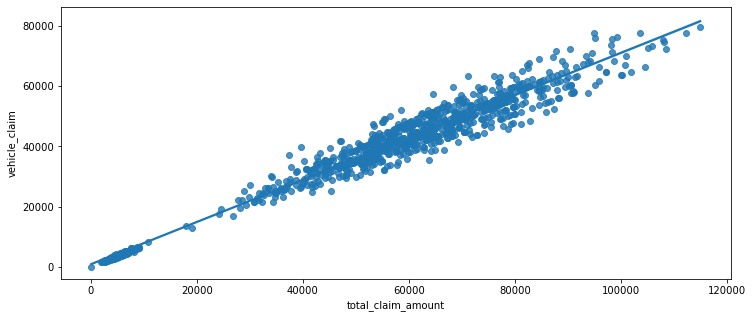

In [54]:
for i in df[['incident_hour_of_the_day','injury_claim','property_claim','vehicle_claim']]:
    plt.figure(figsize=(12,5))
    sns.regplot(x='total_claim_amount',y=i,data=df)
    plt.show()

From above regression plots we can see that Total Claim Amount made is positively correlated with Injury claim, Property claim, Vehicle Claim & Incident hour of the day.

# Data Preparation

Removing the columns which are not useful for the M.L. Model.

In [55]:
df.drop({'policy_number','policy_bind_date','insured_zip','incident_date','incident_location','auto_make','auto_model','auto_year','_c39'},axis=1,inplace=True)  # Removing Non-useful columns
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,0,1,NO,6500,1300,650,4550,N


# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,2,0,0,2,5070,780,780,3510,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,2,0,63400,6340,6340,50720,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,0,1,0,6500,1300,650,4550,0


Now we can see that all the Columns with String Values have been converted to Integer values using Label Encoding.

# CORRELATION

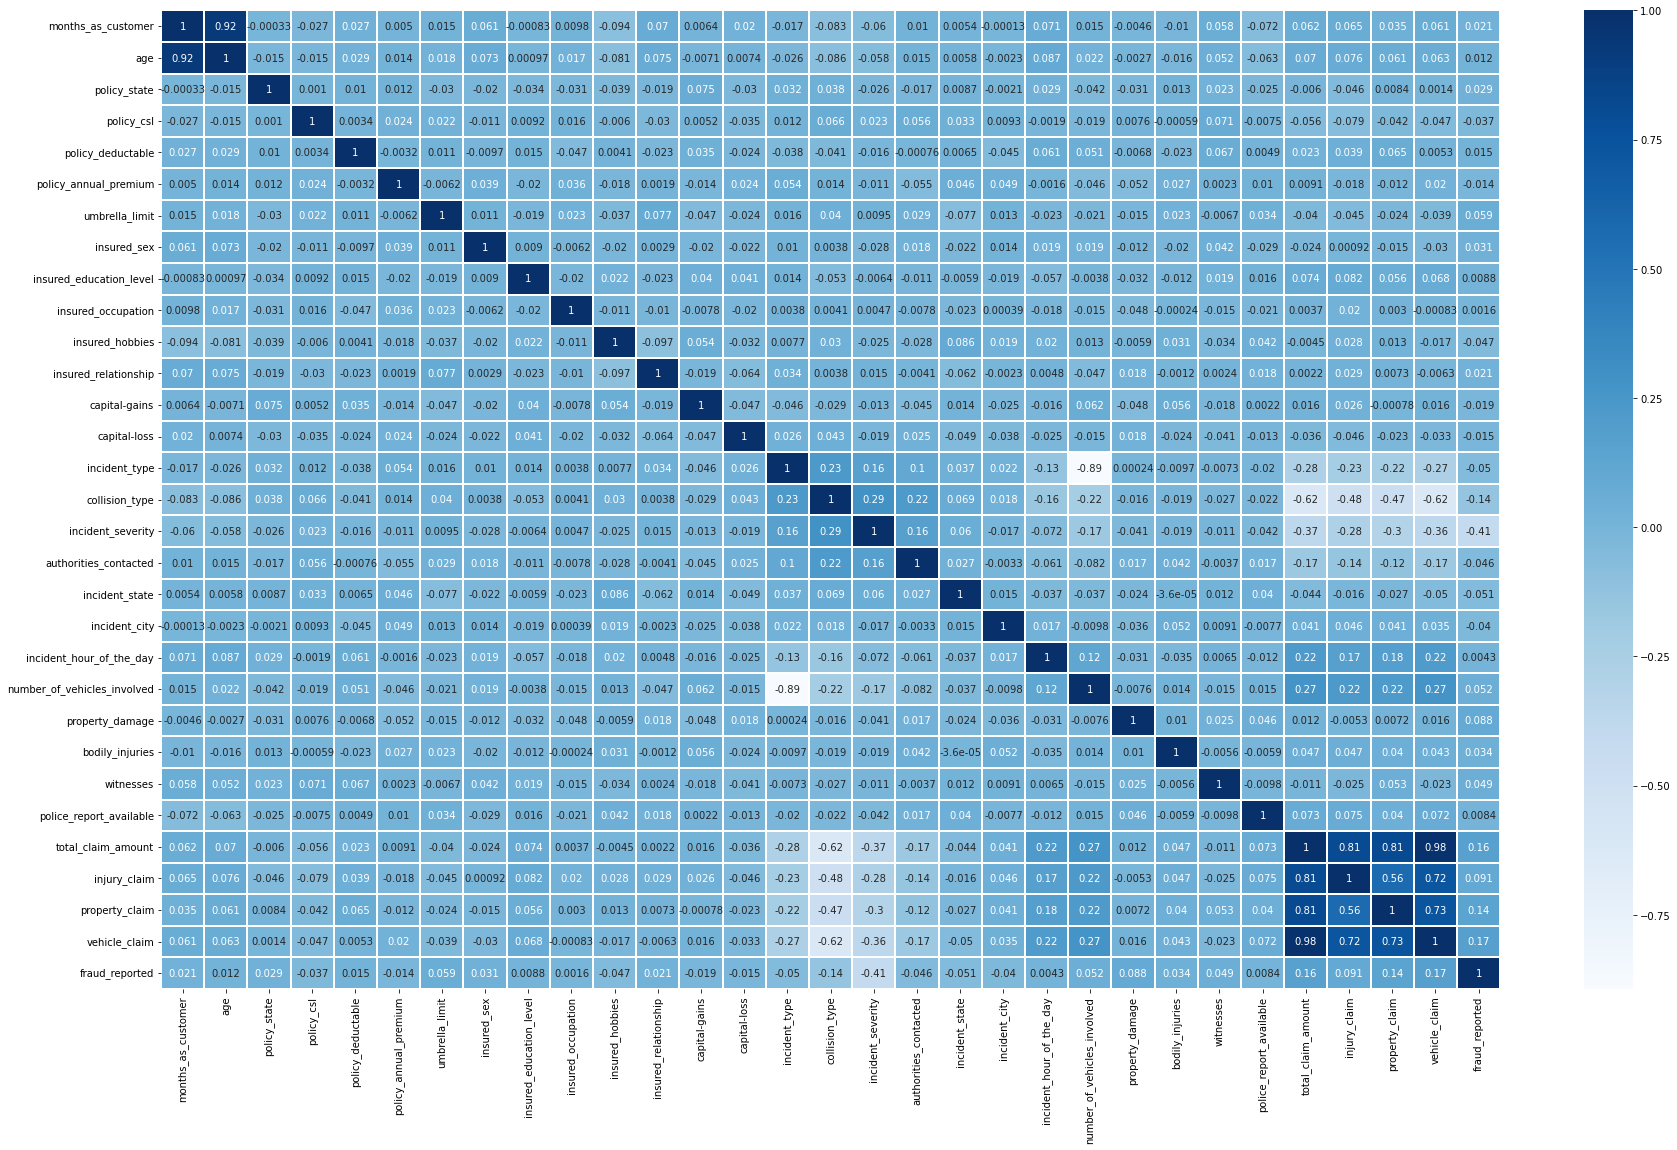

In [57]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above correlation chart we can see that the some columns are having high correlation(>=0.7) b/w them, these are :-
   1. months_as_customer & age
   2. incident_type & number_of_vehicles_involved
   3. total_claim_amount & vehicle_claim
   4. total_claim_amount & property_claim  
   5. total_claim_amount & injury_claim 
   6. injury_claim & vehicle_claim 
   7. property_claim & vehicle_claim 

CORRELATION with the Fraud_reported Column

In [58]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
collision_type                -0.135725
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
police_report_available        0.008399
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432
insured_sex                    0.030873
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622


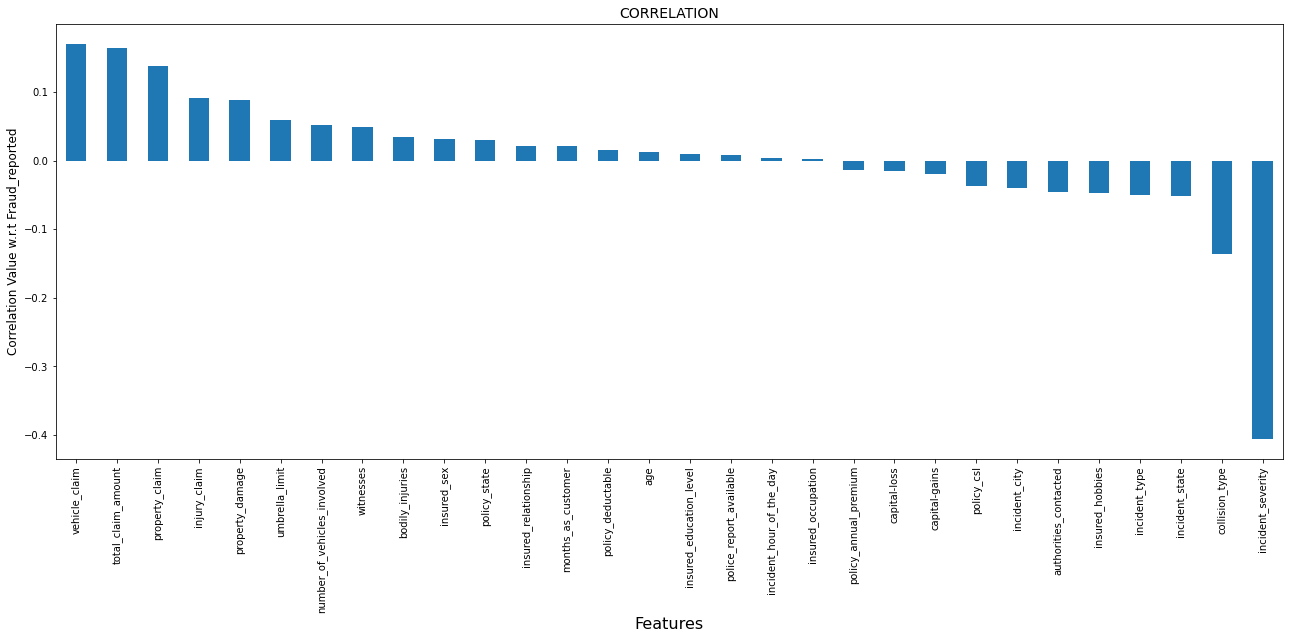

In [59]:
plt.figure(figsize=(22,8))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Fraud_reported",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

OBSERVATION from Above Correlation Chart:-
   1. Columns 'vehicle_claim', 'total_claim_amount', 'property_claim','injury_claim' are showing +ve Correlation with the Target Variable i.e. fraud_reported.
   2. Whereas'incident_severity' & 'collision_type' Columns have -ve correlation with the Target (fraud_reported) Column.

In [60]:
print(df['fraud_reported'].value_counts())

0    753
1    247
Name: fraud_reported, dtype: int64


# Data Balancing

Splitting data into Target & Independent columns

In [61]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,2,0,0,2,5070,780,780,3510,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,2,0,63400,6340,6340,50720,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,0,1,0,6500,1300,650,4550,0


In [62]:
x=df.drop({'fraud_reported'},axis=1)         # Independent Columns

y=df.iloc[:,-1]          # Target Column

In [63]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

As we can see that the no. of entries for each value of fraud_reported has big Difference.Therefore, Using SMOTE to Balance the data.

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1506, dtype: int32

In [65]:
dy.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

Now we can see that the Data is Balanced.

In [66]:
dy = pd.DataFrame(dy)
dy

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
1501,1
1502,1
1503,1
1504,1


In [67]:
dx.shape

(1506, 30)

# Treating Outliers

Removing Outliers using Z-score

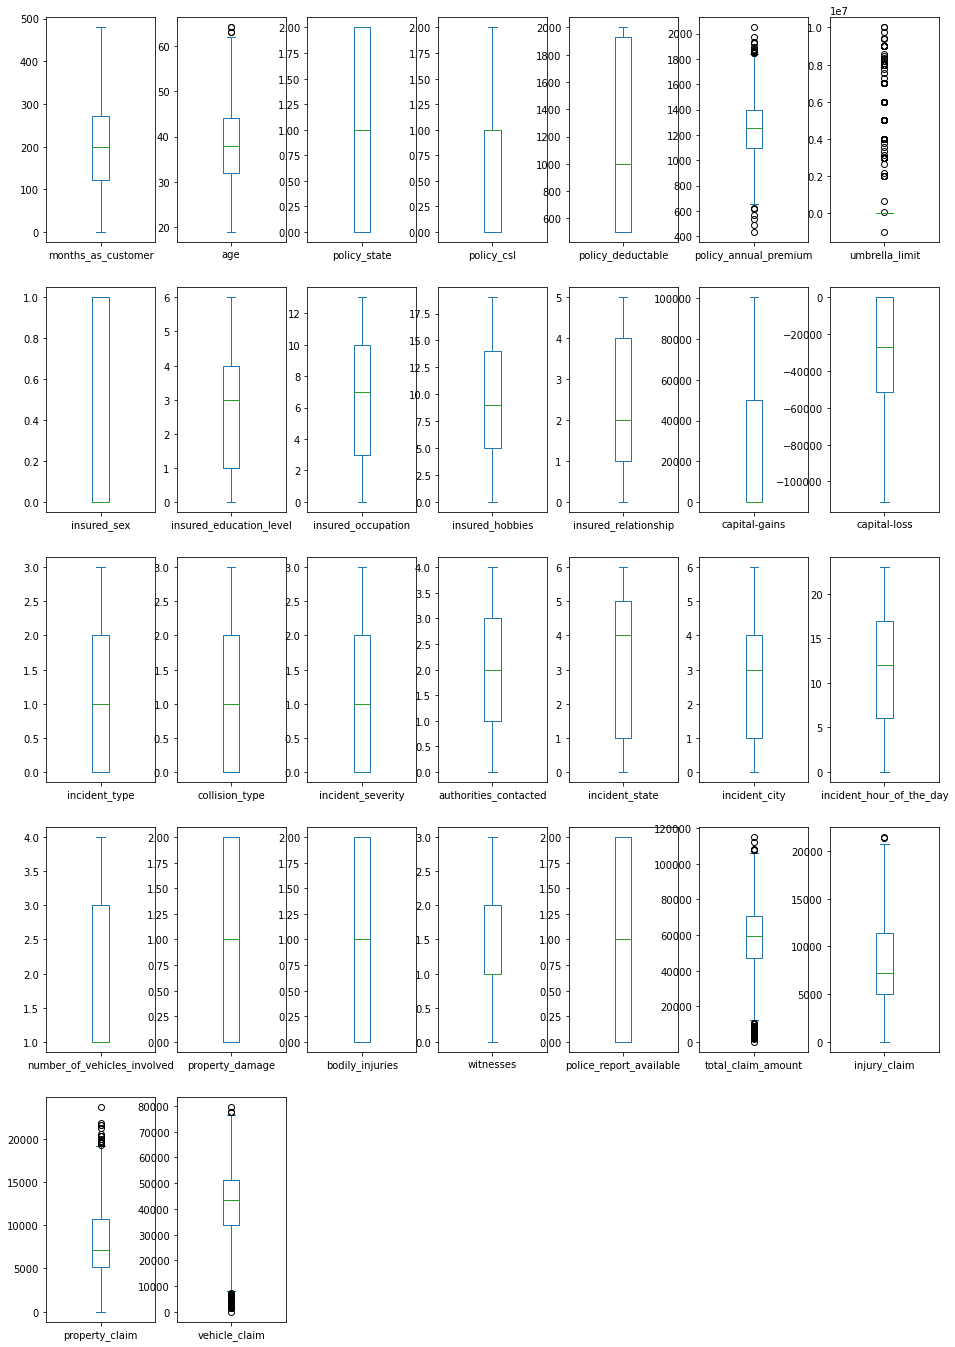

In [68]:
dx.plot(kind='box',subplots=True,layout=(5,7),figsize=(16,24)) 
plt.show()

Removing policy_annual_premium column as it contains ouliers & also shows no correlation with the Target Variable.

In [69]:
dx.drop({'policy_annual_premium'},axis=1,inplace=True)  
dx.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,2,1,1000,0,1,4,2,17,...,5,1,1,1,2,1,71610,6510,13020,52080
1,228,42,1,1,2000,5000000,1,4,6,15,...,8,1,2,0,0,2,5070,780,780,3510
2,134,29,2,0,2000,5000000,0,6,11,2,...,7,3,0,2,3,0,34650,7700,3850,23100
3,256,41,0,1,2000,6000000,0,6,1,2,...,5,1,2,1,2,0,63400,6340,6340,50720
4,228,44,0,2,1000,6000000,1,0,11,2,...,20,1,0,0,1,0,6500,1300,650,4550


We can see that ouliers are present in other continuous columns i.e.'total_claim_amount','injury_claim','property_claim'& 'vehicle_claim'. We will remove these outliers using Z-Score.

Removing Outliers using Z-score

In [70]:
from scipy.stats import zscore               # Removing Outliers from independent columns with continuous(numerical) values
z=np.abs(zscore(dx[['total_claim_amount','injury_claim','property_claim', 'vehicle_claim']]))
z

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.672612,0.281284,1.180198,0.704833
1,2.104362,1.531236,1.539525,2.125565
2,0.869873,0.021695,0.857372,0.983965
3,0.329977,0.318368,0.304095,0.625580
4,2.044682,1.417802,1.568411,2.064960
...,...,...,...,...
1501,0.339826,0.313350,0.298985,0.636594
1502,0.727033,0.178975,0.530931,0.923655
1503,1.435049,0.600882,1.388399,1.479070
1504,0.597909,1.067705,0.840455,0.329137


In [71]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
dx=dx[(z<3).all(axis=1)]
dx

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,2,1,1000,0,1,4,2,17,...,5,1,1,1,2,1,71610,6510,13020,52080
1,228,42,1,1,2000,5000000,1,4,6,15,...,8,1,2,0,0,2,5070,780,780,3510
2,134,29,2,0,2000,5000000,0,6,11,2,...,7,3,0,2,3,0,34650,7700,3850,23100
3,256,41,0,1,2000,6000000,0,6,1,2,...,5,1,2,1,2,0,63400,6340,6340,50720
4,228,44,0,2,1000,6000000,1,0,11,2,...,20,1,0,0,1,0,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,232,37,1,0,1000,0,0,5,11,3,...,17,2,0,0,1,0,63636,6363,6363,50909
1502,250,44,1,1,500,0,0,0,9,4,...,8,1,0,1,0,0,72914,6979,10098,55835
1503,158,33,1,1,847,0,0,4,10,16,...,12,1,1,0,2,1,89879,10554,13957,65366
1504,337,51,1,1,500,0,1,1,7,17,...,21,2,0,1,1,2,69820,12694,11491,45633


In [72]:
print(np.where(z>3)[0])

[163 299 301 500 591]


In [73]:
dy= dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
dy

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
1501,1
1502,1
1503,1
1504,1


In [74]:
dx.shape

(1501, 29)

# Treating Skewness

In [75]:
dx.skew().sort_values(ascending=False)

umbrella_limit                 1.624288
incident_severity              0.734637
number_of_vehicles_involved    0.521497
capital-gains                  0.518284
age                            0.483047
insured_sex                    0.478605
policy_deductable              0.456977
collision_type                 0.444973
months_as_customer             0.356138
incident_type                  0.336057
policy_csl                     0.321185
property_claim                 0.272958
police_report_available        0.216921
incident_city                  0.172022
bodily_injuries                0.151904
insured_relationship           0.150036
policy_state                   0.147405
injury_claim                   0.131566
witnesses                      0.106185
property_damage                0.095303
insured_education_level        0.050349
insured_hobbies                0.039463
authorities_contacted         -0.029471
incident_state                -0.031869
insured_occupation            -0.035733


Taking Skewness threshold +/- 0.5. We can see that the following continuous columns are having skewnees which needs to be removed:-
   1. -ve Skewed columns - total_claim_amount & vehicle_claim 

In [76]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [77]:
a = dx.loc[:,['total_claim_amount','vehicle_claim']]    
a.head()   

,total_claim_amount,vehicle_claim
0,71610,52080
1,5070,3510
2,34650,23100
3,63400,50720
4,6500,4550


In [78]:
a.skew()

total_claim_amount   -0.794644
vehicle_claim        -0.820488
dtype: float64

In [79]:
data = pt.fit_transform(a)
a_new = pd.DataFrame(data,columns=a.columns,index=a.index)
a_new.skew()

total_claim_amount   -0.452233
vehicle_claim        -0.462228
dtype: float64

Now we can see that the Skewnees is reduced. Saving this transformed data to the original DataFrame.

In [80]:
dx['total_claim_amount']=a_new['total_claim_amount']
dx['vehicle_claim']=a_new['vehicle_claim']
dx.skew().sort_values(ascending=False)

umbrella_limit                 1.624288
incident_severity              0.734637
number_of_vehicles_involved    0.521497
capital-gains                  0.518284
age                            0.483047
insured_sex                    0.478605
policy_deductable              0.456977
collision_type                 0.444973
months_as_customer             0.356138
incident_type                  0.336057
policy_csl                     0.321185
property_claim                 0.272958
police_report_available        0.216921
incident_city                  0.172022
bodily_injuries                0.151904
insured_relationship           0.150036
policy_state                   0.147405
injury_claim                   0.131566
witnesses                      0.106185
property_damage                0.095303
insured_education_level        0.050349
insured_hobbies                0.039463
authorities_contacted         -0.029471
incident_state                -0.031869
insured_occupation            -0.035733


# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [83]:
calc_vif(dx)

,Variables,VIF FACTOR
0,months_as_customer,33.606932
1,age,151.407008
2,policy_state,2.458116
3,policy_csl,2.276950
4,policy_deductable,5.024462
5,umbrella_limit,1.307530
6,insured_sex,1.714620
7,insured_education_level,3.547417
8,insured_occupation,4.069688
9,insured_hobbies,4.222472


We can see that total_claim_amount & age have the maximum V.I.F Close to each other. We will drop age column as it shows less correlation with the target Fraud_reported.

In [84]:
dx.drop({'age'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,months_as_customer,4.730839
1,policy_state,2.458003
2,policy_csl,2.267350
3,policy_deductable,5.016906
4,umbrella_limit,1.307165
5,insured_sex,1.712300
6,insured_education_level,3.542805
7,insured_occupation,4.067349
8,insured_hobbies,4.220691
9,insured_relationship,3.201258


Not dropping the total_claim_amount as shows good coorelation with the Target.

We can see that now the V.I.F. Values have been reduced significantly. And most of the values are below 10. 

# Data Scaling

As we can see the columns are in different scales. So we will use encoding techniques to scale the data.

In [85]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [86]:
scale=st.fit_transform(dx)
dx=pd.DataFrame(scale,columns=dx.columns)
dx

,months_as_customer,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.128317,1.360757,0.240563,-0.243850,-0.516718,1.267242,0.615181,-1.196204,1.421359,-1.439736,...,-1.011583,-0.854300,0.065578,0.108158,0.594064,0.149612,0.683811,-0.279827,1.209306,0.719913
1,0.210524,0.103062,0.240563,1.484605,1.550035,1.267242,0.615181,-0.143278,1.050355,-0.185503,...,-0.551373,-0.854300,1.311562,-1.160165,-1.331833,1.404183,-1.957619,-1.528761,-1.552764,-1.967639
2,-0.652202,1.360757,-1.072474,1.484605,1.550035,-0.789115,1.704080,1.172880,-1.361172,0.441614,...,-0.704776,1.244398,-1.180406,1.376481,1.557013,-1.104958,-0.957672,-0.020450,-0.859990,-1.071321
3,0.467506,-1.154633,0.240563,1.484605,1.963386,-0.789115,1.704080,-1.459436,-1.361172,1.068731,...,-1.011583,-0.854300,1.311562,0.108158,0.594064,-1.104958,0.294259,-0.316881,-0.298098,0.627855
4,0.210524,-1.154633,1.553599,-0.243850,1.963386,1.267242,-1.562618,1.172880,-1.361172,1.068731,...,1.289467,-0.854300,-1.180406,-1.160165,-0.368884,-1.104958,-1.921804,-1.415420,-1.582099,-1.932622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.247236,0.103062,-1.072474,-0.243850,-0.516718,-0.789115,1.159631,1.172880,-1.175670,1.068731,...,0.829257,0.195049,-1.180406,-1.160165,-0.368884,-1.104958,0.305282,-0.311868,-0.292908,0.640608
1497,0.412438,0.103062,0.240563,-1.108078,-0.516718,-0.789115,-1.562618,0.646417,-0.990168,-0.185503,...,-0.551373,-0.854300,-1.180406,0.108158,-1.331833,-1.104958,0.746796,-0.177602,0.549930,0.977485
1498,-0.431932,0.103062,0.240563,-0.508304,-0.516718,-0.789115,0.615181,0.909648,1.235857,-0.185503,...,0.062240,-0.854300,0.065578,-1.160165,0.594064,0.149612,1.591685,0.601620,1.420749,1.652287
1499,1.210919,0.103062,0.240563,-1.108078,-0.516718,1.267242,-1.018168,0.119954,1.421359,1.068731,...,1.442870,0.195049,-1.180406,0.108158,-0.368884,1.404183,0.597837,1.068063,0.864273,0.289605


# Splitting the Data

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value.

In [88]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 85.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 162 The model preforms very well
Model Accuracy score is :- 85.49848942598187 

At random state 178 The model preforms very well
Model Accuracy score is :- 85.49848942598187 

At random state 201 The model preforms very well
Model Accuracy score is :- 85.80060422960725 

At random state 337 The model preforms very well
Model Accuracy score is :- 86.404833836858 

At random state 503 The model preforms very well
Model Accuracy score is :- 85.1963746223565 

At random state 560 The model preforms very well
Model Accuracy score is :- 86.10271903323263 

At random state 623 The model preforms very well
Model Accuracy score is :- 85.49848942598187 

At random state 776 The model preforms very well
Model Accuracy score is :- 86.404833836858 

At random state 798 The model preforms very well
Model Accuracy score is :- 86.10271903323263 

At random state 874 The model preforms very well
Model Accuracy score is :- 86.10271903323263 



From above we can see that Model is performing best at Random State = 337. Beacuse for random state=337 Model's accuracy score is highest

Therefore, using Random State = 337 for further working & Splitting the DataFrame.

In [105]:
x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=337,test_size=0.22)

In [106]:
x_train.shape

(1170, 28)

In [107]:
y_train.shape

(1170, 1)

In [108]:
x_test.shape

(331, 28)

In [109]:
y_test.shape

(331, 1)

# Testing with Different Models

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
lg = LogisticRegression()
gn = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [lg,gn,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8640483383685801
[[132  20]
 [ 25 154]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       152
           1       0.89      0.86      0.87       179

    accuracy                           0.86       331
   macro avg       0.86      0.86      0.86       331
weighted avg       0.86      0.86      0.86       331



Accuracy Score of GaussianNB() is: 0.8187311178247734
[[117  35]
 [ 25 154]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       152
           1       0.81      0.86      0.84       179

    accuracy                           0.82       331
   macro avg       0.82      0.82      0.82       331
weighted avg       0.82      0.82      0.82       331



Accuracy Score of KNeighborsClassifier() is: 0.7915407854984894
[[ 90  62]
 [  7 172]]
              precision    recall  f1-score   support

           0       0.93      0.59     

From above algorithms we can see that SVC() & LogisticRegression() are permoving well with the data as compared to other algoritms. Whereas SVC() is getting highest accuracy score.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [113]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
et = ExtraTreesClassifier()

model = [rf,bg,ad,gb,et]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.8912386706948641
[[142  10]
 [ 26 153]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       152
           1       0.94      0.85      0.89       179

    accuracy                           0.89       331
   macro avg       0.89      0.89      0.89       331
weighted avg       0.90      0.89      0.89       331



Accuracy Score of BaggingClassifier() is: 0.9003021148036254
[[137  15]
 [ 18 161]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       152
           1       0.91      0.90      0.91       179

    accuracy                           0.90       331
   macro avg       0.90      0.90      0.90       331
weighted avg       0.90      0.90      0.90       331



Accuracy Score of AdaBoostClassifier() is: 0.879154078549849
[[141  11]
 [ 29 150]]
              precision    recall  f1-score   support

           0       0.83      0

From above ensemble methods we can see that RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier() & ExtraTreesClassifier() is performing well with the data aas compared to other ensemble methods.

While out of these ExtraTreesClassifier() is getting the highest accuracy.

# Gradient Descent Algorithm

In [114]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [115]:
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.8006042296072508
[[118  34]
 [ 32 147]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       152
           1       0.81      0.82      0.82       179

    accuracy                           0.80       331
   macro avg       0.80      0.80      0.80       331
weighted avg       0.80      0.80      0.80       331



We can see that SGDClassifier() is not performing that well as compared with other algorithms.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [117]:
from sklearn.model_selection import cross_val_score
model = [lg,svc,rf,bg,gb,et]

for m in model:
    pred_test=m.predict(x_test)
    score = cross_val_score(m,dx,dy,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test)*100)
    print("\n")

For LogisticRegression() Cross Validation score is:- 79.75592469545958
Accuracy Score of LogisticRegression() is: 86.404833836858


For SVC() Cross Validation score is:- 83.15614617940199
Accuracy Score of SVC() is: 88.21752265861026


For RandomForestClassifier() Cross Validation score is:- 85.08615725359911
Accuracy Score of RandomForestClassifier() is: 89.12386706948641


For BaggingClassifier() Cross Validation score is:- 84.7501661129568
Accuracy Score of BaggingClassifier() is: 90.03021148036254


For GradientBoostingClassifier() Cross Validation score is:- 85.35282392026579
Accuracy Score of GradientBoostingClassifier() is: 89.42598187311178


For ExtraTreesClassifier() Cross Validation score is:- 86.3514950166113
Accuracy Score of ExtraTreesClassifier() is: 90.33232628398792




Now from above we can confirm that ExtraTreesClassifier() is working Best for the data as:-
   1. Cross Val-Score is highest is case of ExtraTreesClassifier().
   2. Accuracy Score is highest is case of ExtraTreesClassifier().
   3. Cross Val-Score & Accuracy score are closest to each other for ExtraTreesClassifier()
   
Therefore, Using ExtraTreesClassifier() as the Final Algorithm & Optimization.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [119]:
from sklearn.model_selection import GridSearchCV
et = ExtraTreesClassifier()

In [120]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy','log_loss'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[6,7,8,9]}

gd_sr = GridSearchCV(estimator=et,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}


In [121]:
best_result = gd_sr.best_score_
print(best_result)

0.8538461538461538


In [122]:
gd_sr.best_estimator_

ExtraTreesClassifier(max_depth=9, n_estimators=200)

Using these above parameters for Final training of the Model.

In [123]:
et = ExtraTreesClassifier(max_depth=9, n_estimators=200)

In [124]:
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
print('Accuracy Score of',et,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of ExtraTreesClassifier(max_depth=9, n_estimators=200) is: 0.8942598187311178
[[139  13]
 [ 22 157]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       152
           1       0.92      0.88      0.90       179

    accuracy                           0.89       331
   macro avg       0.89      0.90      0.89       331
weighted avg       0.90      0.89      0.89       331



We can see that the Model performance has reduced. So, using defaullt parameters for the Algorithm.

In [126]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
print('Accuracy Score of',et,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of ExtraTreesClassifier() is: 0.9154078549848943
[[143   9]
 [ 19 160]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       152
           1       0.95      0.89      0.92       179

    accuracy                           0.92       331
   macro avg       0.91      0.92      0.92       331
weighted avg       0.92      0.92      0.92       331



# Cross-Validation of Best Model

In [128]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(et,dx,dy,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 83.88237905015534
Accuracy Score of model is :- 91.54078549848943


At cv:- 3
Cross Validation score is:- 83.02129075182968
Accuracy Score of model is :- 91.54078549848943


At cv:- 4
Cross Validation score is:- 85.81914893617021
Accuracy Score of model is :- 91.54078549848943


At cv:- 5
Cross Validation score is:- 86.3514950166113
Accuracy Score of model is :- 91.54078549848943


At cv:- 6
Cross Validation score is:- 85.75112881806109
Accuracy Score of model is :- 91.54078549848943


At cv:- 7
Cross Validation score is:- 86.88980656379047
Accuracy Score of model is :- 91.54078549848943


At cv:- 8
Cross Validation score is:- 85.42176299920355
Accuracy Score of model is :- 91.54078549848943


At cv:- 9
Cross Validation score is:- 86.68285918123593
Accuracy Score of model is :- 91.54078549848943




We Accuracy score is closest to Cross Val Score at cv = 7. Using cv=7 for final Model validation.

In [132]:
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
score = cross_val_score(et,dx,dy,cv=7)
c_score = score.mean()
print("For",et,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',et,'is:',accuracy_score(y_test,pred_test)*100)

For ExtraTreesClassifier() Cross Validation score is:- 86.75784767286615
Accuracy Score of ExtraTreesClassifier() is: 91.23867069486404


We can see that the Cross Validation Score is very close to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting.

# AUC ROC Curve

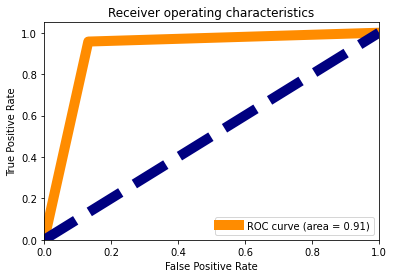

In [133]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

From above we can confirm that are Model is performing Well as the Area Under the Curve is Almost 91%

# Saving the best Model

In [135]:
import pickle

filename = 'Rainfall Tomorrow.pkl'

pickle.dump(et, open(filename,'wb'))  

# Conclusion

In [136]:
loaded_model = pickle.load(open('Rainfall Tomorrow.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9123867069486404


In [137]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
326,1,1
327,0,0
328,0,0
329,0,0


From above we can see that almost all the predicted & original values are matching. Hence our model is performing good.